# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="/Users/Temp/Data3402/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [4]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [5]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

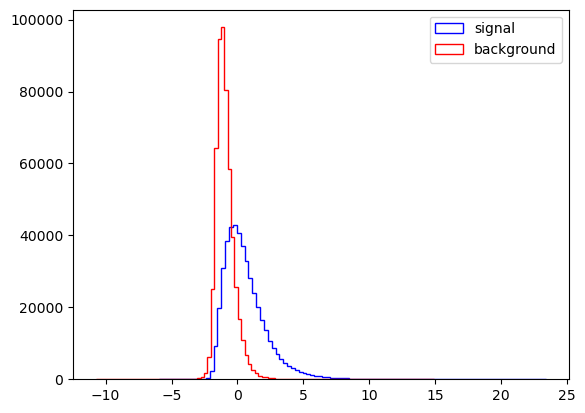

In [6]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

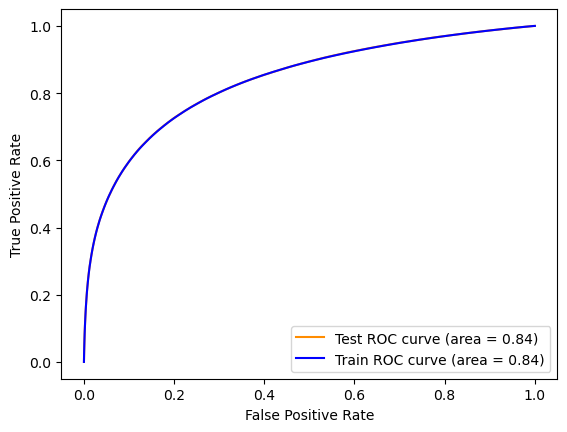

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
tr_fpr,tr_tpr,tr_=roc_curve(y_Train, Fisher.decision_function(X_Train))

roc_auc = auc(fpr, tpr)
tr_roc_auc=auc(tr_fpr, tr_tpr)

plt.plot(fpr,tpr,color='darkorange',label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot(tr_fpr,tr_tpr,color='blue',label='Train ROC curve (area = %0.2f)' % tr_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [8]:
#separating raw and features
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [9]:
#Train using raw

#looking only at raw observables
rawset=['signal',"l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"] #including signal column
rawdf=df[rawset]

#setting amount of datapoints in training set (to be used for all three performances)
N_Train=4000000

#separating the raw observables dataset into train/test
raw_Train_Sample=rawdf[:N_Train]
raw_Test_Sample=rawdf[N_Train:]

#separating variables from target variable for train sample; 'signal' = target
raw_X_Train=raw_Train_Sample[rawset[1:]] #excluding the first column 'signal'
raw_y_Train=raw_Train_Sample["signal"]

#separating variables from target variable, but for test sample
raw_X_Test=raw_Test_Sample[rawset[1:]]
raw_y_Test=raw_Test_Sample["signal"]

#from test sample, separating signal and background
raw_Test_sig=raw_Test_Sample[raw_Test_Sample.signal==1]
raw_Test_bkg=raw_Test_Sample[raw_Test_Sample.signal==0]

#training Fischer instance
rawinst=DA.LinearDiscriminantAnalysis()
rawinst.fit(raw_X_Train,raw_y_Train)

#FPR/TPR
raw_fpr, raw_tpr, raw_ = roc_curve(raw_y_Test, rawinst.decision_function(raw_X_Test))
raw_roc_auc = auc(raw_fpr, raw_tpr)


In [10]:
#Train using features

#looking only at features
featset=['signal','dPhi_r_b','S_R','cos_theta_r1','M_R','MET_rel',
         'M_TR_2','R','MT2','M_Delta_R','axial_MET'] #including signal column
featdf=df[featset]

#separating the features dataset into train/test
feat_Train_Sample=featdf[:N_Train]
feat_Test_Sample=featdf[N_Train:]

#separating variables from target variable for train sample; 'signal' = target
feat_X_Train=feat_Train_Sample[featset[1:]] #excluding the first column 'signal'
feat_y_Train=feat_Train_Sample["signal"]

#separating variables from target variable, but for test sample
feat_X_Test=feat_Test_Sample[featset[1:]]
feat_y_Test=feat_Test_Sample["signal"]

#from test sample, separating signal and background
feat_Test_sig=feat_Test_Sample[feat_Test_Sample.signal==1]
feat_Test_bkg=feat_Test_Sample[feat_Test_Sample.signal==0]

#training Fischer instance
featinst=DA.LinearDiscriminantAnalysis()
featinst.fit(feat_X_Train,feat_y_Train)

#FPR/TPR
feat_fpr, feat_tpr, feat_ = roc_curve(feat_y_Test, featinst.decision_function(feat_X_Test))
feat_roc_auc = auc(feat_fpr, feat_tpr)


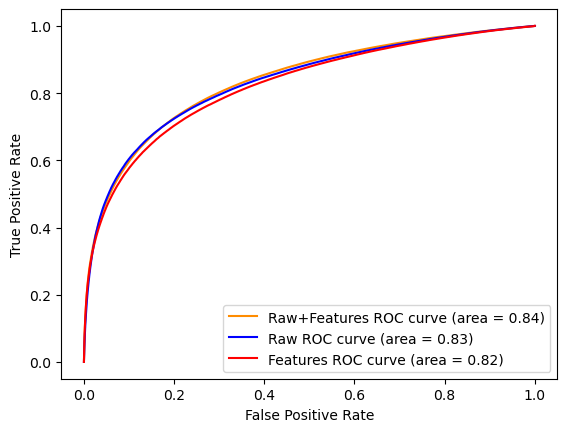

In [11]:
#note: raw+features is the original shown in 3a

#plotting ROC curves
plt.plot(fpr,tpr,color='darkorange',label='Raw+Features ROC curve (area = %0.2f)' % roc_auc)
plt.plot(raw_fpr,raw_tpr,color='blue',label='Raw ROC curve (area = %0.2f)' % raw_roc_auc)
plt.plot(feat_fpr,feat_tpr,color='red',label='Features ROC curve (area = %0.2f)' % feat_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [12]:
#selectin 3 classifiers; Linear Support Vector Machines, K-Nearest Neighbors

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [13]:
#naming the classifiers
names=['Linear SVM','K-Nearest Neighbors','Decision Tree']

#creating instances for each classifier
classifier_instances=[SVC(kernel='linear', C=0.025, random_state=543),
                      KNeighborsClassifier(5),
                      DecisionTreeClassifier(max_depth=10,random_state=423)]

#creating a dictionary linking name and classifier instance
classifiers = dict(zip(names,classifier_instances))

#dictinoary of dataset names and dataset (Raw only, Features only, Raw+Features)
datasets={
    'Raw only' : rawdf,
    'Features only' : featdf,
    'Raw+Features' : df
}

In [14]:
#function that takes classifier instances and makes ROC comparisons
def roc_compare(instances,dfs,target):
    #empty lists to retain variables for ROC curve
    fpr_lst=[]
    tpr_lst=[]
    roc_auc_lst=[]

    # iterate over classifiers
    for cls_name, clf in classifiers.items():
        #iterating over datasets
        for ds_name,ds in dfs.items():
            X=ds.drop(target,axis=1) #excluding signal column
            y=ds[target] #only signal column

            #train, test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=425)

            #training classifier instance
            clf.fit(X_Train,y_Train)

            #FPR/TPR + ROC_AUC
            fpr, tpr, _ = roc_curve(y_Test, clf.decision_function(X_Test))
            roc_auc = auc(fpr, tpr)

            #adding values to respective list
            fpr_lst.append(fpr)
            tpr_lst.append(tpr)
            roc_auc_lst.append(roc_auc)

        #ROC Curve showing all three curves (raw only, features only, raw+features)
        colors=['darkorange','blue','red']
        for i in range(len(fpr_lst)):
            plt.plot(fpr_lst[i],tpr_lst[i],color=colors[i],label='ROC curve (area = %0.2f)' % roc_auc_lst[i])

        plt.legend(loc="lower right")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
        

In [ ]:
#running function
roc_compare(classifiers,datasets,'signal')

In [15]:
#Using Professor's function because mine ran for over 2 hours and had to be interrupted
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sys

def fit_all(datasets,classifiers, max_ds=None, max_cls=None):
    scores = dict()
    for ds_cnt, (ds_name,ds) in enumerate(datasets.items()):
        # preprocess dataset, split into training and test part
        X=ds.drop('signal',axis=1) #excluding signal column
        y=ds['signal'] #only signal column
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )

        if max_ds:
            if ds_cnt>max_ds:
                print("Max Datasets Reached.")
                sys.stdout.flush()
                break
                
        scores[ds_name] = dict()
        # iterate over classifiers
        for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
            print(ds_cnt,cls_cnt,"Running classifier",cls_name,"on dataset",ds_name,". N_Train = ",X_train.shape[0] )
            sys.stdout.flush()
            clf_0 = make_pipeline(StandardScaler(), clf)
            clf_0.fit(X_train.to_numpy(), y_train.to_numpy().reshape((len(y_train),)))
            score = clf.score(X_test.to_numpy(), y_test.to_numpy())

            scores[ds_name][cls_name] = score
            if max_cls:
                if cls_cnt>max_cls:
                    print("Max Classifiers Reached.")
                    sys.stdout.flush()
                    break


    return scores

In [ ]:
scores = fit_all(datasets,classifiers,1,2)

0 0 Running classifier Linear SVM on dataset Raw only . N_Train =  300000


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [ ]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,accuracy_score

#function that takes classifier instances and calculates scores + table
def scores_compare(instances,dataframe,target, max_cls=None):
    #empty lists to retain scores
    scores=dict()

    X=df.drop(target,axis=1) #excluding signal column
    y=df[target] #only signal column
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)
                
    # iterate over classifiers
    for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
        scores[cls_name] = dict()
        print(cls_cnt,"Running classifier",cls_name,"on dataset. N_Train = ",X_train.shape[0] )
        sys.stdout.flush()
        clf_0 = make_pipeline(StandardScaler(), clf)
        clf_0.fit(X_train.to_numpy(), y_train.to_numpy().reshape((len(y_train),)))
        y_pred=clf.decision_function(X_Test)

        #adding scores to dictionary for ease in creating tabulate table
        scores[cls_name]['ROC_AUC'] = roc_auc_score(y_test,y_pred)
        scores[cls_name]['Precision'] = precision_score(y_test,y_pred)
        scores[cls_name]['Recall'] = recall_score(y_test,y_pred)
        scores[cls_name]['F1'] = f1_score(y_test,y_pred)
        scores[cls_name]['Accuracy'] = accuracy_score(y_test,y_pred)
        if max_cls:
            if cls_cnt>max_cls:
                print("Max Classifiers Reached.")
                sys.stdout.flush()
                break

    display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))


In [ ]:
scores_compare(classifiers,df,'signal',2)

0 Running classifier Linear SVM on dataset. N_Train =  3000000
